### **Standardization**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../Database/Social_Network_Ads.csv')
data = data.drop(columns=['User ID', 'Gender'])

data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
from sklearn.model_selection import train_test_split

x = data.iloc[:, 0:2]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

x_train.shape, y_train.shape

((320, 2), (320,))

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

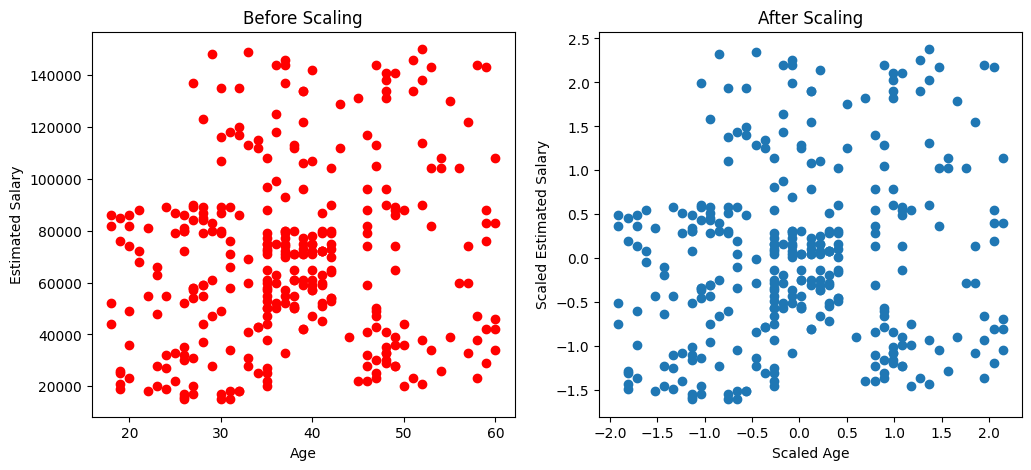

In [5]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'], c='red')
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')

ax2.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
ax2.set_title('After Scaling')
ax2.set_xlabel('Scaled Age')
ax2.set_ylabel('Scaled Estimated Salary')

plt.show()

Demonstration: Why Scaling is Important?

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

scaled_lr = LogisticRegression()
scaled_lr.fit(scaled_x_train, y_train)
scaled_lr_pred = scaled_lr.predict(scaled_x_test)

In [7]:
from sklearn.metrics import accuracy_score

print("Accuracy of Simple LR", accuracy_score(y_test, lr_pred))
print("Accuracy of Scaled LR", accuracy_score(y_test, scaled_lr_pred))

Accuracy of Simple LR 0.8125
Accuracy of Scaled LR 0.8125


**Why do we need to scale the data?**

- Algorithms like K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) rely on distance calculations between data points.<br>
If features have different scales, the distance metric can be biased towards features with larger scales.
- Gradient descent based algorithms, converge faster when features are on a similar scale. This is because the gradient descent algorithm <br> takes smaller steps when features are scaled, leading to faster convergence.

**When scaling is not recommended?**
- Tree-Based Algorithms: (Decision Treen & Random Forests)
- Tree-Based Ensemble Techniques: (Gradient Boosting & XGBoost - because they often handle scaling internally)


### Normalization

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('../../Database/wine_data.csv', header=None, usecols=[0,1,2])
data.columns = ['Class label', 'Alcohol', 'Malic acid']
data.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

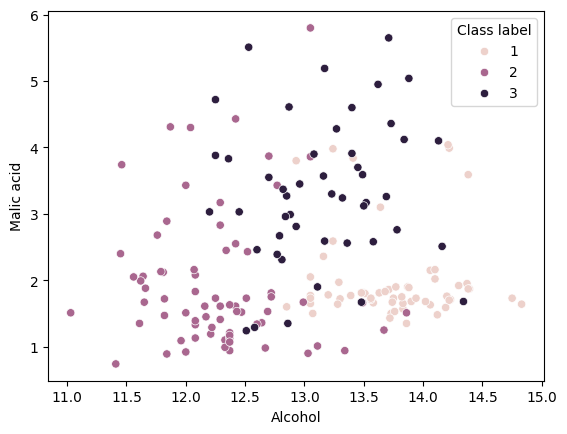

In [10]:
color_dict = {1:'red', 2:'green', 3:'blue'}
sns.scatterplot(
    x=data['Alcohol'],
    y=data['Malic acid'],
    hue = data['Class label'],
    # palette = color_dict
)

In [13]:
from sklearn.model_selection import train_test_split

x = data.iloc[:,1:]
y = data.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### **MinMax Scaler** : (0 - 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train)

scaled_x_train = min_max_scaler.transform(x_train)
scaled_x_test = min_max_scaler.transform(x_test)

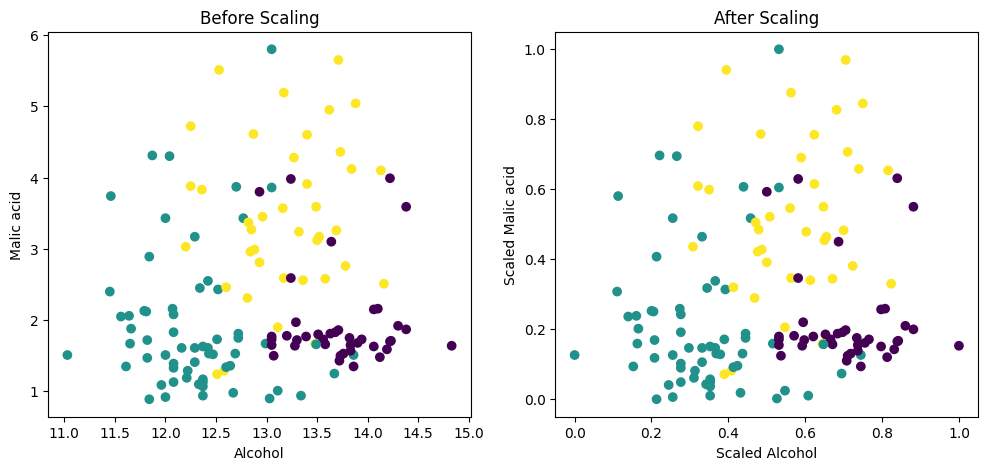

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'], c=y_train)
ax1.set_title('Before Scaling')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

ax2.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1], c=y_train)
ax2.set_title('After Scaling')
ax2.set_xlabel('Scaled Alcohol')
ax2.set_ylabel('Scaled Malic acid')

plt.show()

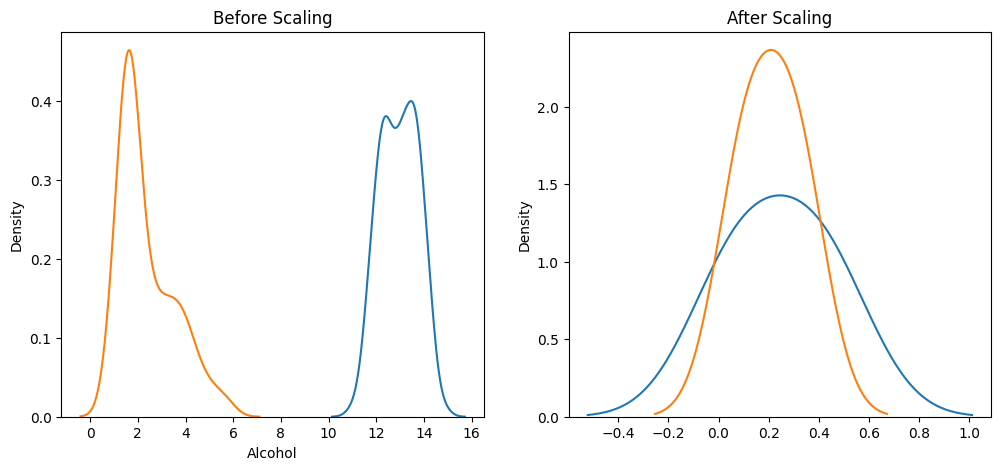

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(scaled_x_train[0], ax=ax2)
sns.kdeplot(scaled_x_train[1], ax=ax2)

plt.show()

In [18]:
x_train.describe()

,Alcohol,Malic acid
count,142.000000,142.000000
mean,12.952958,2.356620
std,0.794066,1.164352
min,11.030000,0.890000
25%,12.332500,1.530000
50%,13.010000,1.820000
75%,13.610000,3.157500
max,14.830000,5.800000


In [20]:
pd.DataFrame(scaled_x_train).describe()

,0,1
count,142.000000,142.000000
mean,0.506042,0.298701
std,0.208965,0.237139
min,0.000000,0.000000
25%,0.342763,0.130346
50%,0.521053,0.189409
75%,0.678947,0.461813
max,1.000000,1.000000


### **Max Absolute Scaler** : (sparse data - where you often see 0s in columns)

In [ ]:
# from sklearn.preprocessing import MaxAbsScaler

# mas_scaler = MaxAbsScaler()
# mas_scaler.fit(x_train)

# mas_x_train = mas_scaler.transform(x_train)
# mas_x_test = mas_scaler.transform(x_test)

### **Robust Scaler** : (when outliers in data)

In [ ]:
# from sklearn.preprocessing import RobustScaler

# robust_scaler = RobustScaler()
# robust_scaler.fit(x_train)

# robust_x_train = robust_scaler.transform(x_train)
# robust_x_test = robust_scaler.transform(x_test)

### 1. Standard Scaler

The **Standard Scaler** standardizes features by removing the mean and scaling to unit variance. It ensures the feature has a mean of 0 and a standard deviation of 1.

##### Formula:

$$ z = \frac {x - \mu}{\sigma} $$

Where:
 -  x = Original value  
 -  $\mu$ = Mean of the feature
 -  $\sigma$ = Standard deviation of the feature


---
<br>

### 2. Min-Max Scaler

The **Min-Max Scaler** scales features to a fixed range, typically \([0, 1]\). It maintains the relationships between the original values.

##### Formula:

$$ x' = \frac
{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$$


Where:
- $x$ = Original value  
- ${min}(x)$ = Minimum value in the feature  
- ${max}(x)$ = Maximum value in the feature  


---
<br>


### 3. Max Absolute Scaler

The **Mean Absolute Scaler** scales features based on their mean absolute deviation, providing robust normalization.

##### Formula:

$$x' = \frac {x_i}{\max(x)}$$


Where:
- $x_i$ = each value  
- $\max(x)$ = Maximum value in the feature


---
<br>

### 4. Robust Scaler

The **Robust Scaler** uses the median and interquartile range (IQR) for scaling, making it less sensitive to outliers.

##### Formula:

$$ x' = \frac{x - \text{median}(x)}{\text{IQR}}$$


Where:
- $x$ = Original value  
- ${median}(x)$ = Median of the feature  
- ${IQR}$ = Interquartile range (75th percentile - 25th percentile) 
